In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")


In [81]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_combine_data = pd.read_csv('train_combine.csv')

train_data.head(10)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175
8,8,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.532557,0.465367,36.166044,6465.37205
9,9,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.340063,0.381768,28.763565,3519.43131


In [82]:
train_combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16066 entries, 0 to 16065
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    16066 non-null  int64  
 1   clonesize             16066 non-null  float64
 2   honeybee              16066 non-null  float64
 3   bumbles               16066 non-null  float64
 4   andrena               16066 non-null  float64
 5   osmia                 16066 non-null  float64
 6   MaxOfUpperTRange      16066 non-null  float64
 7   MinOfUpperTRange      16066 non-null  float64
 8   AverageOfUpperTRange  16066 non-null  float64
 9   MaxOfLowerTRange      16066 non-null  float64
 10  MinOfLowerTRange      16066 non-null  float64
 11  AverageOfLowerTRange  16066 non-null  float64
 12  RainingDays           16066 non-null  float64
 13  AverageRainingDays    16066 non-null  float64
 14  fruitset              16066 non-null  float64
 15  fruitmass          

In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [84]:
train_data.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


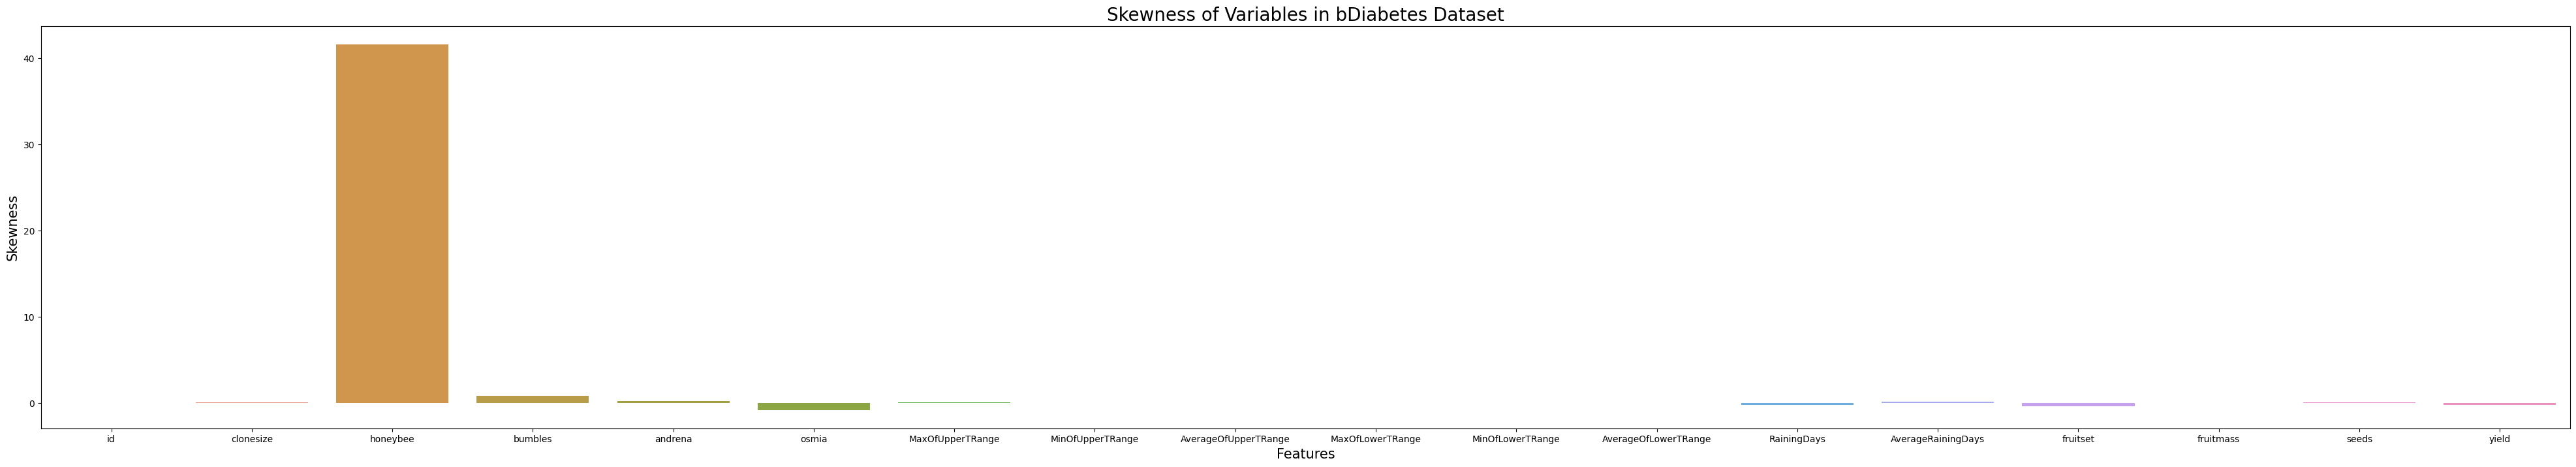

In [85]:
# Reviewing Skew of Attribute Distribution
skew_value = train_data.skew()

skewness_values = pd.DataFrame({
    'Variable': train_data.columns,
    'Skewness': skew_value
})
plt.figure(figsize=(50,8))
# Plot the skewness values using a barplot
sns.barplot(x='Variable', y='Skewness', data=skewness_values)

# Add labels and a title to the plot

plt.xlabel("Features",size=15)
plt.ylabel("Skewness",size=15)
plt.title("Skewness of Variables in bDiabetes Dataset",size=20)

plt.show()

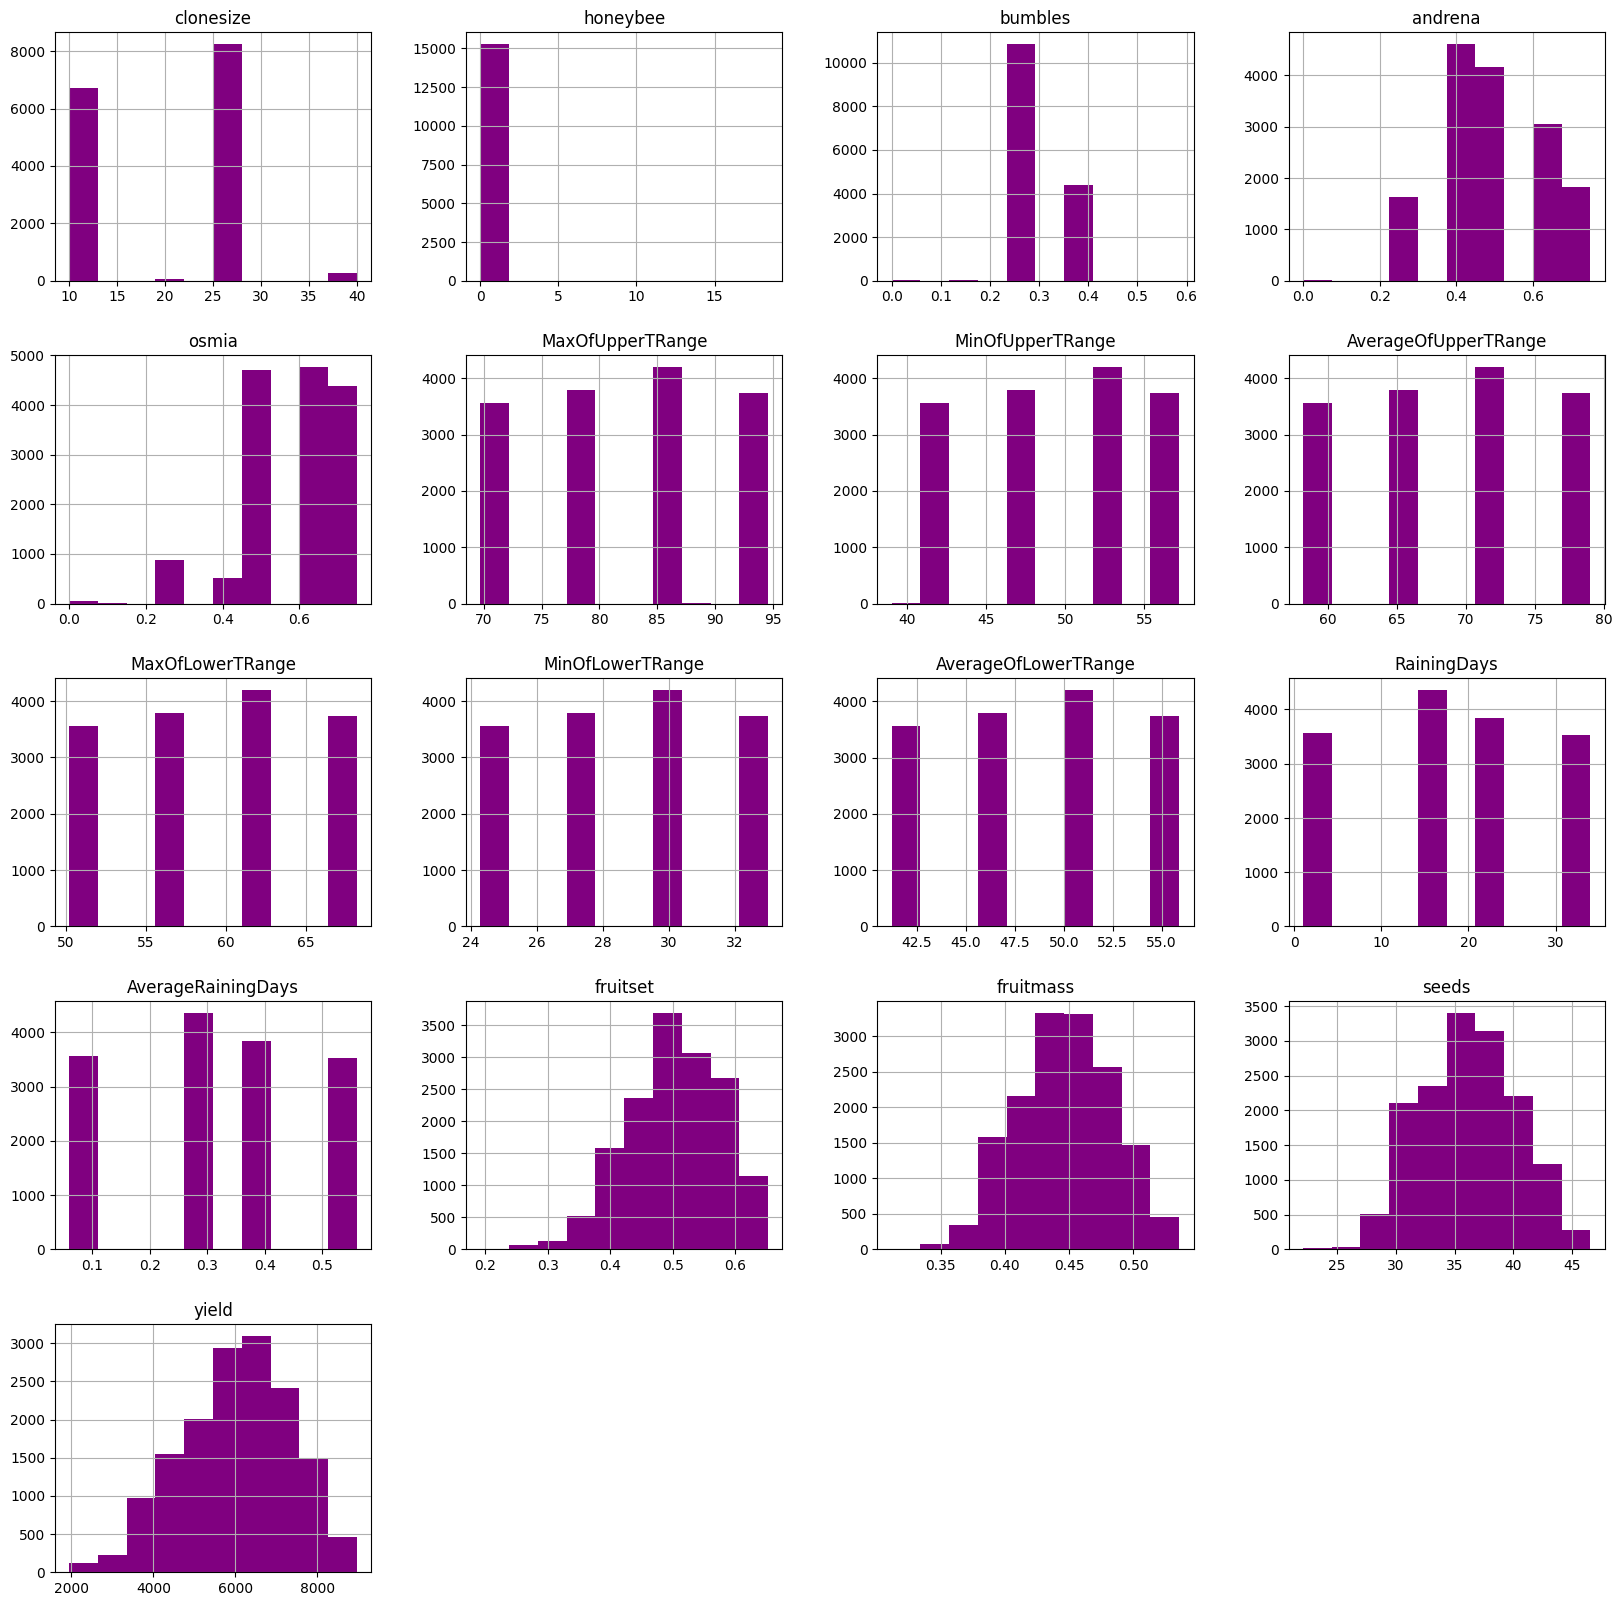

In [86]:
# Histrogram for each attribute in dataset
train_data.hist(figsize=(20,20),column=train_data.drop(columns=['id']).columns,color='purple')
plt.show()

In [87]:
X = train_combine_data.drop(columns=['id','yield'])
y = train_combine_data[['yield']]
X_test = test_data.drop(columns=['id']) 

### Feature Selection Method

In [88]:
# Reviewing Correlation between attributes
correlations = round(X.corr(),4)
correlations # 1 represent full positive correlation, -1 represent negative correllation

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
clonesize,1.0000,0.2664,0.0766,0.0620,-0.0142,0.0170,0.0167,0.0169,0.0172,0.0169,0.0168,0.1559,0.1548,-0.4147,-0.3827,-0.4021
honeybee,0.2664,1.0000,-0.0446,0.0093,-0.0351,0.0079,0.0077,0.0080,0.0080,0.0079,0.0075,0.0298,0.0200,-0.1012,-0.1329,-0.1366
bumbles,0.0766,-0.0446,1.0000,-0.1542,0.1671,-0.0033,-0.0020,-0.0025,-0.0029,-0.0026,-0.0023,-0.0565,-0.0526,0.1678,0.1752,0.1887
andrena,0.0620,0.0093,-0.1542,1.0000,0.3154,-0.0138,-0.0135,-0.0137,-0.0137,-0.0138,-0.0138,-0.0230,-0.0231,0.0753,0.0664,0.0650
osmia,-0.0142,-0.0351,0.1671,0.3154,1.0000,-0.0333,-0.0315,-0.0328,-0.0335,-0.0330,-0.0326,-0.0696,-0.0673,0.2169,0.2011,0.2100
MaxOfUpperTRange,0.0170,0.0079,-0.0033,-0.0138,-0.0333,1.0000,0.9982,0.9997,0.9995,0.9998,0.9997,0.0106,0.0095,0.0004,0.1416,0.0559
MinOfUpperTRange,0.0167,0.0077,-0.0020,-0.0135,-0.0315,0.9982,1.0000,0.9989,0.9977,0.9988,0.9990,0.0111,0.0101,0.0018,0.1430,0.0573
AverageOfUpperTRange,0.0169,0.0080,-0.0025,-0.0137,-0.0328,0.9997,0.9989,1.0000,0.9994,1.0000,1.0000,0.0105,0.0095,0.0016,0.1432,0.0573
MaxOfLowerTRange,0.0172,0.0080,-0.0029,-0.0137,-0.0335,0.9995,0.9977,0.9994,1.0000,0.9994,0.9993,0.0105,0.0094,0.0007,0.1420,0.0563
MinOfLowerTRange,0.0169,0.0079,-0.0026,-0.0138,-0.0330,0.9998,0.9988,1.0000,0.9994,1.0000,1.0000,0.0108,0.0097,0.0009,0.1422,0.0565


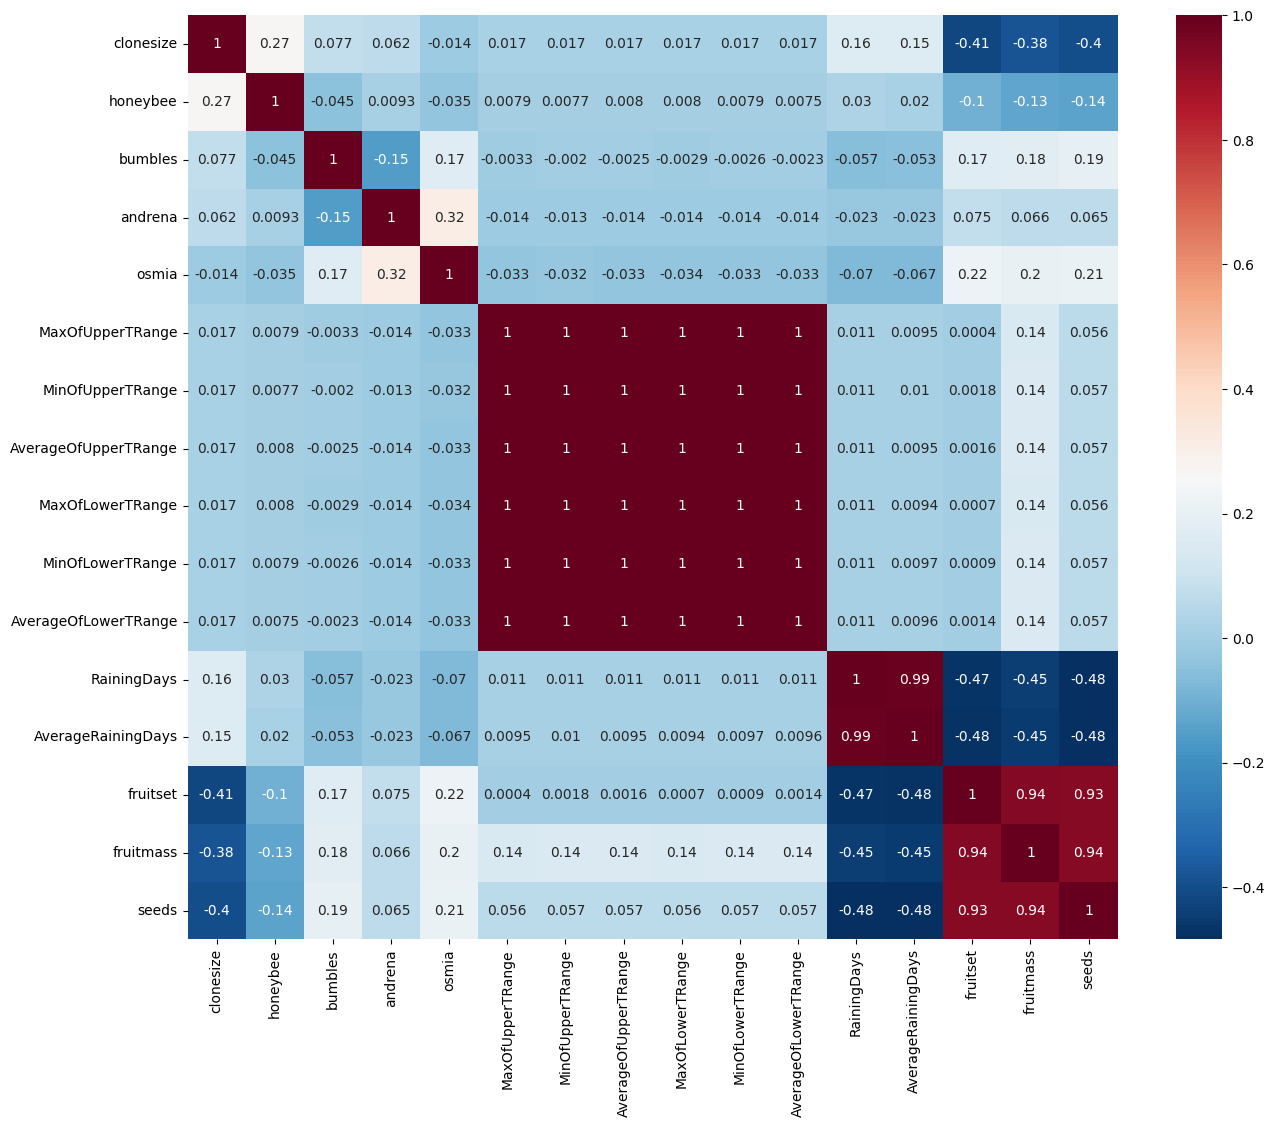

In [89]:
plt.figure(figsize=(15,12))
sns.heatmap(correlations, annot=True,cmap ='RdBu_r')
plt.show()

In [90]:
# Loop over bottom diagonal of correlation matrix
threshold = 0.9
high_corr = []
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > threshold:
            colname = correlations.columns[i]
            high_corr.append(colname)
            
set(high_corr)

# remove highly correlated features
# df.drop(high_corr, axis=1, inplace=True)

{'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'fruitmass',
 'seeds'}

In [91]:
# Merge features and targets together for checking correlation
X_y = X.copy()
X_y['yield'] = y
X_y

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.500,0.250,0.750,0.500,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.425011,0.417545,32.460887,4476.811460
1,25.0,0.500,0.250,0.500,0.500,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.444908,0.422051,33.858317,5548.122010
2,12.5,0.250,0.250,0.630,0.630,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.552927,0.470853,38.341781,6869.777600
3,12.5,0.250,0.250,0.630,0.500,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.565976,0.478137,39.467561,6880.775900
4,25.0,0.500,0.250,0.630,0.630,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.579677,0.494165,40.484512,7479.934170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16061,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
16062,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
16063,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
16064,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [92]:
correlation = X_y.corr()
correlation_target = correlation[['yield']].drop(labels=['yield'])
correlation_target

,yield
clonesize,-0.389311
honeybee,-0.103364
bumbles,0.169122
andrena,0.077499
osmia,0.208686
MaxOfUpperTRange,-0.030623
MinOfUpperTRange,-0.029537
AverageOfUpperTRange,-0.029808
MaxOfLowerTRange,-0.030340
MinOfLowerTRange,-0.030245


In [93]:
X["fruit_seed"] = X["fruitset"] * X["seeds"]
X["pollinators"] = X["honeybee"] + X["bumbles"] + X["andrena"] + X["osmia"]
X = X.drop(columns=['RainingDays', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'honeybee', 'bumbles', 'andrena' , 'osmia'])

X_test["fruit_seed"] = X_test["fruitset"] * X_test["seeds"]
X_test["pollinators"] = X_test["honeybee"] + X_test["bumbles"] + X_test["andrena"] + X_test["osmia"]
X_test = X_test.drop(columns=['RainingDays', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'honeybee', 'bumbles', 'andrena' , 'osmia'])

print(X.columns)
print(X_test.columns)

Index(['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'fruit_seed', 'pollinators'],
      dtype='object')
Index(['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'fruit_seed', 'pollinators'],
      dtype='object')


In [94]:
# X_original = X.drop(columns=['AverageOfLowerTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','MinOfUpperTRange'])
# X_test_original = X_test.drop(columns=['AverageOfLowerTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','MinOfUpperTRange'])
# print(X_original.columns)
# print(X_test_original.columns)

In [178]:
sc = StandardScaler()
X_scaler = pd.DataFrame(sc.fit_transform(X),columns=[X.columns])
X_scaler

,clonesize,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,fruit_seed,pollinators
0,0.806994,-1.367088,0.401957,-1.041036,-0.779043,-0.914464,-1.012326,0.507131
1,0.806994,-1.367088,0.401957,-0.774448,-0.657912,-0.569273,-0.737234,-0.020312
2,-1.081815,0.413492,0.401957,0.672801,0.653985,0.538225,0.594449,0.000786
3,-1.081815,-0.513894,0.401957,0.847642,0.849787,0.816314,0.841306,-0.273485
4,0.806994,-0.513894,0.401957,1.031199,1.280662,1.067519,1.086580,0.528229
...,...,...,...,...,...,...,...,...
16061,-1.459577,0.413492,-1.607043,-0.212979,-0.497674,-0.670760,-0.472719,-1.347359
16062,3.073564,0.413492,-1.607043,-2.141960,-1.844396,-1.902262,-1.888696,-1.347359
16063,0.051470,0.413492,0.401957,-1.314276,-1.205811,-1.337519,-1.306374,-1.347359
16064,0.051470,-0.606632,-1.607043,-1.355532,-1.252439,-1.378544,-1.341394,-1.347359


### Feature Selection

In [96]:
def feature_selection(model,x_data):
    
    # Ensure the random distributions are same when execute 
    np.random.seed(0)
    
    sfs = SFS(model,
          k_features=8,
          forward=True,
          floating=False,
          scoring='neg_mean_absolute_error',
          cv=3)
    
    sfs.fit(x_data, y)
    
    print('Feature selection: \n\n')
    for idx, score in sfs.subsets_.items():
        print(idx,':', score, '\n')
    
    print('Model MAE: \n\n')
    for idx, score in sfs.subsets_.items():
        print(idx,':', -1 * score['avg_score'].round(4))  # multiply by -1 to convert back to MAE score

    
    plot_sfs(sfs.get_metric_dict())
    plt.grid()
    plt.title('Accuracy vs Number of Features')
    plt.show()

In [97]:
features_train, features_test, labels_train, labels_test = train_test_split(X,y,test_size=.2,random_state=36,shuffle=True)

print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(12852, 8)
(3214, 8)
(12852, 1)
(3214, 1)


In [98]:
print(X)

       clonesize  AverageOfLowerTRange  AverageRainingDays  fruitset  \
0           25.0                  41.2                0.39  0.425011   
1           25.0                  41.2                0.39  0.444908   
2           12.5                  50.8                0.39  0.552927   
3           12.5                  45.8                0.39  0.565976   
4           25.0                  45.8                0.39  0.579677   
...          ...                   ...                 ...       ...   
16061       10.0                  50.8                0.06  0.486815   
16062       40.0                  50.8                0.06  0.342841   
16063       20.0                  50.8                0.39  0.404617   
16064       20.0                  45.3                0.06  0.401538   
16065       20.0                  45.3                0.39  0.384646   

       fruitmass      seeds  fruit_seed  pollinators  
0       0.417545  32.460887   13.796231        2.000  
1       0.422051  33.8583

### XGBoost Model

In [99]:
# xgboost_model = XGBRegressor()

# feature_selection(xgboost_model,X)

In [100]:
# X_data = X[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds']]
# min_mae_xgboost = []

# for i in range(42):
#     features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=i,shuffle=True)

#     xgboost_model = XGBRegressor(subsample= 0.7, 
#                                  reg_lambda=0.1, 
#                                  reg_alpha=0.1, 
#                                  objective='reg:squarederror', 
#                                  n_estimators=1000, 
#                                  min_child_weight=5, 
#                                  max_depth= 4, 
#                                  learning_rate= 0.01, 
#                                  gamma=0.2, 
#                                  eval_metric='mae', 
#                                  colsample_bytree=0.9)

#     xgboost_model.fit(features_train, labels_train)
#     predicted = xgboost_model.predict(features_test)
#     mae = mean_absolute_error(labels_test, predicted)
#     min_mae_xgboost.append(mae)

# for i,value in enumerate(min_mae_xgboost):
#     if value == min(min_mae_xgboost):
#         print("Mean Absolute Error:", min(min_mae_xgboost), 'random_state:', i)

### LGBM Model

In [101]:
# lgbm_model = LGBMRegressor()

# feature_selection(lgbm_model,X)

In [102]:
# X_data = X[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds']]
# features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=36,shuffle=True)


# lgbm_model = LGBMRegressor(subsample= 0.9, 
#                            reg_lambda=0, 
#                            reg_alpha= 0.3, 
#                            objective = 'mae', 
#                            num_leaves = 64, 
#                            n_estimators= 1000, 
#                            min_child_weight= 15, 
#                            max_depth= 5, 
#                            learning_rate= 0.05,
#                            colsample_bytree= 0.9, 
#                            force_col_wise= True
#                           )

# parameters = {
#               'min_child_samples':[25,20,15,10,5],
#               'subsample_freq':[0,2,4,6,8,10],
#               'max_bin':[128,150,200,255],
#             }

# grid = GridSearchCV(lgbm_model,parameters,scoring='neg_mean_absolute_error',cv=3)
# grid.fit(features_train, labels_train)

# print("Best parameters:", grid.best_params_)
# print("Best score of training data:", round(grid.best_score_*100,2), "%\n")

# # predict on test data with best hyperparameters
# y_pred = grid.predict(features_test)

# # calculate MAE on test data with best hyperparameters
# mae = mean_absolute_error(labels_test, y_pred)
# print("Test MAE with Best Hyperparameters: ", mae)

In [141]:
# X_data = X[['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
#        'fruitmass', 'seeds', 'fruit_seed', 'pollinators']]
# min_mae_lgbm = []

# for i in range(42):
    
#     features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=i,shuffle=True)
#     lgbm_model = LGBMRegressor(subsample= 0.9, 
#                                reg_lambda=0, 
#                                reg_alpha= 0.3, 
#                                objective = 'mae', 
#                                num_leaves = 64, 
#                                n_estimators= 1000, 
#                                min_child_weight= 15, 
#                                max_depth= 5, 
#                                learning_rate= 0.05,
#                                colsample_bytree= 0.9, 
#                                force_col_wise= True,
#                               )

#     lgbm_model.fit(features_train, labels_train)
#     predicted = lgbm_model.predict(features_test)
#     mae = mean_absolute_error(labels_test, predicted)
#     min_mae_lgbm.append(mae)
    
# for i,value in enumerate(min_mae_lgbm):
#     if value == min(min_mae_lgbm):
#         print("Mean Absolute Error:", min(min_mae_lgbm), 'random_state:', i)

In [142]:
X_data = X[['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'fruit_seed', 'pollinators']]

features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=1,shuffle=True)

lgbm_model_2 = LGBMRegressor(subsample= 0.9, 
                               reg_lambda=0, 
                               reg_alpha= 0.3, 
                               objective = 'mae', 
                               num_leaves = 64, 
                               n_estimators= 1000, 
                               min_child_weight= 15, 
                               max_depth= 5, 
                               learning_rate= 0.05,
                               colsample_bytree= 0.9, 
                               force_col_wise= True,
                              )

lgbm_model_2.fit(features_train, labels_train)
lgbm_predicted_2 = lgbm_model_2.predict(features_test)
lgbm_mae_2 = mean_absolute_error(labels_test, lgbm_predicted_2)
print(lgbm_mae_2)

319.8239336554108


## CatBoost Model

In [105]:
# cat_model = CatBoostRegressor(verbose=False)

# feature_selection(cat_model,X)

In [190]:
cat_model = CatBoostRegressor(verbose=False, 
                                  subsample=0.7,
                                  random_strength=0.1, 
                                  loss_function='MAE', 
                                  learning_rate=0.05, 
                                  l2_leaf_reg=1, 
                                  iterations=1000,
                                  depth= 16, 
                                  colsample_bylevel= 0.9, 
                                  grow_policy="Lossguide",
                                  border_count=980,
                                  max_leaves=35
                               )
                               

parameters = {
                 'max_leaves':[x for x in range(20,40,1)]
            }

grid = GridSearchCV(cat_model,parameters,scoring='neg_mean_absolute_error',cv=3)
grid.fit(features_train, labels_train)

print("Best parameters:", grid.best_params_)
print("Best score of training data:", round(grid.best_score_*100,2), "%\n")

# predict on test data with best hyperparameters
y_pred = grid.predict(features_test)

# calculate MAE on test data with best hyperparameters
mae = mean_absolute_error(labels_test, y_pred)
print("Test MAE with Best Hyperparameters: ", mae)

Best parameters: {'max_leaves': 25}
Best score of training data: -33223.86 %

Test MAE with Best Hyperparameters:  324.611918591631


In [192]:
X_data = X[['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'fruit_seed', 'pollinators']]

features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=36,shuffle=True)

# cb_params = {
# 'verbose': False, 'subsample': 0.5, 'random_strength': 0.05, 'loss_function': 'MAE', 'learning_rate': 0.05, 'l2_leaf_reg': 0, 'iterations': 1000, 'grow_policy': 'Lossguide', 'depth': 16, 'colsample_bylevel': 0.7, 'bagging_temperature': 0.1
#         }
# cat_model_2 = CatBoostRegressor(**cb_params)
cat_model_2 = CatBoostRegressor(verbose=False, 
                                  subsample=0.7,
                                  random_strength=0.1, 
                                  loss_function='MAE', 
                                  learning_rate=0.05, 
                                  l2_leaf_reg=1, 
                                  iterations=1000,
                                  depth= 16, 
                                  colsample_bylevel= 0.9, 
                                  grow_policy="Lossguide",
                                  border_count=980,
                                  max_leaves=31
                               )


cat_model_2.fit(features_train, labels_train)
cat_predicted_2 = cat_model_2.predict(features_test)
cat_mae_2 = mean_absolute_error(labels_test, cat_predicted_2)
print(cat_mae_2)

323.2033351434962


In [179]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import LinearRegression,Ridge
# from sklearn.ensemble import GradientBoostingRegressor

# X_data = X[['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
#        'fruitmass', 'seeds', 'fruit_seed', 'pollinators']]

# features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=36,shuffle=True)

# cat_model_2 = CatBoostRegressor(verbose=False, 
#                                   subsample=0.7,
#                                   random_strength=0.1, 
#                                   loss_function='MAE', 
#                                   learning_rate=0.05, 
#                                   l2_leaf_reg=1, 
#                                   iterations=1000,
#                                   depth= 16, 
#                                   colsample_bylevel= 0.9, 
#                                   grow_policy="Lossguide",
#                                   border_count=980
#                                )

# lgbm_model_2 = LGBMRegressor(subsample= 0.9, 
#                                reg_lambda=0, 
#                                reg_alpha= 0.3, 
#                                objective = 'mae', 
#                                num_leaves = 64, 
#                                n_estimators= 1000, 
#                                min_child_weight= 15, 
#                                max_depth= 5, 
#                                learning_rate= 0.05,
#                                colsample_bytree= 0.9, 
#                                force_col_wise= True,
#                               )

# meta_model_list = [LinearRegression(), CatBoostRegressor(),Ridge(alpha=1.0),GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)]
# meta_model_1 = LinearRegression(),
# meta_model_2 = CatBoostRegressor(verbose=False)
# meta_model_3 = Ridge(alpha=1.0)
# meta_model_4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# print(meta_model_list)


# for i in meta_model_list:

#     stacked_model = StackingRegressor(
#         estimators=[('cat', cat_model_2), ('lgbm', lgbm_model_2)],
#         final_estimator=i
#     )

#     stacked_model.fit(features_train, labels_train)
#     stacked_predicted = stacked_model.predict(features_test)
#     stacked_mae = mean_absolute_error(labels_test, stacked_predicted)
#     print(stacked_mae)


In [174]:
# from sklearn.model_selection import KFold
# import numpy as np
# from sklearn.linear_model import LinearRegression

# X_data = X[['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
#        'fruitmass', 'seeds', 'fruit_seed', 'pollinators']]
# features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=36,shuffle=True)

# cat_model_2 = CatBoostRegressor(verbose=False, 
#                                   subsample=0.7,
#                                   random_strength=0.1, 
#                                   loss_function='MAE', 
#                                   learning_rate=0.05, 
#                                   l2_leaf_reg=1, 
#                                   iterations=1000,
#                                   depth= 16, 
#                                   colsample_bylevel= 0.9, 
#                                   grow_policy="Lossguide",
#                                   border_count=980
#                                )

# lgbm_model_2 = LGBMRegressor(subsample= 0.9, 
#                                reg_lambda=0, 
#                                reg_alpha= 0.3, 
#                                objective = 'mae', 
#                                num_leaves = 64, 
#                                n_estimators= 1000, 
#                                min_child_weight= 15, 
#                                max_depth= 5, 
#                                learning_rate= 0.05,
#                                colsample_bytree= 0.9, 
#                                force_col_wise= True,
#                               )


# meta_model_1 = LinearRegression()

# stacked_model = StackingRegressor(
#         estimators=[('cat', cat_model_2), ('lgbm', lgbm_model_2)],
#         final_estimator=meta_model_1
#     )

# stacked_model.fit(features_train, labels_train)
# stacked_predicted = stacked_model.predict(features_test)
# stacked_mae = mean_absolute_error(labels_test, stacked_predicted)
# print(stacked_mae)



326.76575305414565


In [110]:
# X_data = X_original[['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
#        'fruitmass', 'seeds', 'fruit_seed', 'pollinators']]

# features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=36)

# cat_model_3 = CatBoostRegressor(verbose=False, 
#                                   subsample=0.7, 
#                                   random_strength=0.1, 
#                                   loss_function='MAE', 
#                                   learning_rate=0.05, 
#                                   l2_leaf_reg=1, 
#                                   iterations=1010, 
#                                   depth= 16, 
#                                   colsample_bylevel= 0.9, 
#                                   grow_policy="Lossguide",
#                                   border_count=1000,
#                                   leaf_estimation_iterations=1,
#                                   one_hot_max_size=1  
#                                )

# cat_model_3.fit(features_train, labels_train)
# cat_predicted_3 = cat_model_3.predict(features_test)
# cat_mae_3 = mean_absolute_error(labels_test, cat_predicted_3)
# print(cat_mae_3)

In [111]:
# X_data = X[['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
#        'fruitmass', 'seeds', 'fruit_seed', 'pollinators']]

# features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=36,shuffle=True)

# # cb_params = {
# # 'verbose': False, 'subsample': 0.5, 'random_strength': 0.05, 'loss_function': 'MAE', 'learning_rate': 0.05, 'l2_leaf_reg': 0, 'iterations': 1000, 'grow_policy': 'Lossguide', 'depth': 16, 'colsample_bylevel': 0.7, 'bagging_temperature': 0.1
# #         }
# # cat_model_2 = CatBoostRegressor(**cb_params)
# cat_model_2 = CatBoostRegressor(verbose=False, 
#                                   subsample=0.7,
#                                   random_strength=0.1, 
#                                   loss_function='MAE', 
#                                   learning_rate=0.05, 
#                                   l2_leaf_reg=1.001, 
#                                   iterations=980,
#                                   depth= 16, 
#                                   colsample_bylevel= 0.9, 
#                                   grow_policy="Lossguide",
#                                   border_count=980
#                                )


# cat_model_2.fit(features_train, labels_train)
# cat_predicted_2 = cat_model_2.predict(features_test)
# cat_mae_2 = mean_absolute_error(labels_test, cat_predicted_2)
# print(cat_mae_2)

In [112]:
# X_data = X[['clonesize', 'honeybee', 'bumbles', 'osmia', 'MaxOfUpperTRange', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]
# features_train, features_test, labels_train, labels_test = train_test_split(X_data,y,test_size=.2,random_state=6,shuffle=True)


# model = Sequential()
# model.add(InputLayer(input_shape=(X.shape[1],)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# opt = Adam(learning_rate=0.01)
# model.compile(optimizer=opt, loss='mse', metrics=['mae'])

# model.fit(features_train,labels_train,batch_size=20, epochs=40, verbose=0)
# #evaluate the model on the test data
# val_mse, val_mae = model.evaluate(features_test, labels_test, verbose=0)

# print("MAE: ", val_mae)

In [113]:
# def do_grid_search():
    
#     batch_size = [20, 40, 60]
#     epochs = [10, 20, 30, 40, 50]
#     model = KerasRegressor(build_fn=design_model())
#     param_grid = dict(batch_size=batch_size, epochs=epochs)
#     grid = GridSearchCV(estimator = model, param_grid=param_grid, scoring = make_scorer(mean_squared_error, greater_is_better=False),return_train_score = True)
#     grid_result = grid.fit(features_train, labels_train, verbose = 0)
#     print(grid_result)
#     print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# #     means = grid_result.cv_results_['mean_test_score']
# #     stds = grid_result.cv_results_['std_test_score']
# #     params = grid_result.cv_results_['params']
# #     for mean, stdev, param in zip(means, stds, params):
# #         print("%f (%f) with: %r" % (mean, stdev, param))
    
# do_grid_search()

# # model.fit(X_train,y_train,batch_size=10, epochs=40, verbose=0)
# # #evaluate the model on the test data
# # val_mse, val_mae = model.evaluate(X_test, y_test, verbose=0)

# # print("MAE: ", val_mae)

In [114]:
# model.fit(X_train,y_train,batch_size=20, epochs=10, verbose=0)
# #evaluate the model on the test data
# val_mse, val_mae = model.evaluate(X_test, y_test, verbose=0)

# print("MAE: ", val_mae)

### Write Data to CSV

In [193]:
X_train = X
y_train = y
X_test = X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(16066, 8)
(16066, 1)
(10194, 8)


In [194]:
print(X_train.columns)
print(X_test.columns)
final_model = cat_model_2.fit(X_train,y_train)
final_predicted = final_model.predict(X_test)
column1 = test_data['id']
column2 = list(final_predicted)
dataset=pd.DataFrame({'id':column1,'yield':column2})
dataset.to_csv('submission.csv',index=False)

Index(['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'fruit_seed', 'pollinators'],
      dtype='object')
Index(['clonesize', 'AverageOfLowerTRange', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'fruit_seed', 'pollinators'],
      dtype='object')
